In [1]:
# 2
import sqlite3
conn = sqlite3.connect('2018-2024_grammys.sqlite3')
c = conn.cursor()


# 3
def count_winner_custom_year(year, is_winner):
    if is_winner.lower() not in ('true', 'false'):
        return f"თქვენ მიერ შეყვანილი მნიშვნელობა არასწორია: {is_winner}. მიუთითე 'True' ან 'False'"
    if not isinstance(year, int):
        return f"თქვენ შეიყვანეთ არასწორი მონაცემი: {year}. მიუთითე რიცხვი"
    return c.execute('SELECT count(*) FROM "2018-2024_grammys" WHERE Year=? and Winner=?', (year, str(is_winner.upper()))).fetchone()[0]


print(count_winner_custom_year(2023, 'True'))
# ეს ფუნქცია ბეჭდავს რაოდენობას მომხმარებლის სურვილისამებრ გადაცემულ წელს რამდენმა მონაწილემ გაიმარჯვა ან ვერ გაიმარჯვა.



def custom_3_winners(custom_year):
    c.execute("SELECT nominee FROM '2018-2024_grammys' WHERE winner='TRUE' AND year=?", (custom_year,))
    winners = c.fetchmany(3)
    return winners
print(custom_3_winners(2021))
# გამოაქვს პირველი 3 გამარჯვებულის სახელი მითითებული წლიდან.


# 4
# მომხმარებლისგან ინფორმაციის მიღება
year = int(input("შეიყვანე წელი: "))
ceremony = input("შეიყვანე ცერემონიის ნომერი: ")
award_id = input("შეიყვანე ჯილდოს ID: ")
award_type = input("შეიყვანე ჯილდოს კატეგორია: ")
award_name = input("შეიყვანე ჯილდოს დასახელება: ")
work = input("შეიყვანე ნამუშევარი (თუ არის): ")
nominee = input("შეიყვანე ნომინირებული: ")
winner = input("მოიგო თუ არა (True/False): ")
new_nominee = (year, ceremony, award_id, award_type, award_name, work, nominee, winner)

# ბაზაში დამატების ბრძანება
c.execute('''
            INSERT INTO "2018-2024_grammys"
            (Year, Ceremony, "Award ID", "Award Type", "Award Name", Work, Nominee, Winner)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', new_nominee)



# 5
# მომხმარებლისგან ინფორმაციის მიღება
record_id = input("შეიყვანე რიგის ნომერი, რომლის ნომინირებულიც უნდა განახლდეს: ")
new_nominee = input("შეიყვანე ახალი ნომინირებული: ")

# # განახლების ბრძანება
c.execute('''
    UPDATE "2018-2024_grammys"
    SET Nominee=?
    WHERE "Field 1"=?
''', (new_nominee, record_id))

# 6
# მომხმარებლისგან ინფორმაციის მიღება
delete_id = input("შეიყვანე რიგის ნომერი, რომლის ჩანაწერიც უნდა წაიშალოს: ")

# წაშლის ბრძანება
c.execute('''
    DELETE FROM "2018-2024_grammys"
    WHERE "Field 1"=?
''', (delete_id,))

conn.commit()
conn.close()

93
[('St. Vincent',), ('Cedric Burnside',), ('Christone "Kingfish" Ingram',)]


შეიყვანე წელი:  2022
შეიყვანე ცერემონიის ნომერი:  65
შეიყვანე ჯილდოს ID:  627
შეიყვანე ჯილდოს კატეგორია:  Music
შეიყვანე ჯილდოს დასახელება:  Record Of The Year
შეიყვანე ნამუშევარი (თუ არის):  N95
შეიყვანე ნომინირებული:  Kendrick Lamar
მოიგო თუ არა (True/False):  True
შეიყვანე რიგის ნომერი, რომლის ნომინირებულიც უნდა განახლდეს:  2
შეიყვანე ახალი ნომინირებული:  Pink Floyd
შეიყვანე რიგის ნომერი, რომლის ჩანაწერიც უნდა წაიშალოს:  5


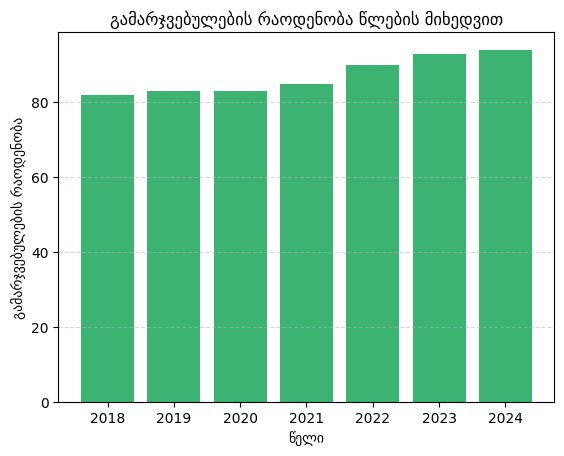

In [2]:
import matplotlib.pyplot as plt

conn = sqlite3.connect('2018-2024_grammys.sqlite3')
c = conn.cursor()

# მონაცემების გამოტანა — თითო წელიწადში რამდენი გამარჯვებულია
c.execute('''
    SELECT Year, COUNT(*) 
    FROM "2018-2024_grammys"
    WHERE Winner='TRUE'
    GROUP BY Year
''')
data = c.fetchall()


# years შეიცავს წლების მნიშვნელობებს, winners_count — შესაბამის წლებში გამარჯვებულების რაოდენობას
years = [row[0] for row in data]
winners_count = [row[1] for row in data]

# დიაგრამის აგება
plt.bar(years, winners_count, color='mediumseagreen')
plt.title('გამარჯვებულების რაოდენობა წლების მიხედვით')
plt.xlabel('წელი')
plt.ylabel('გამარჯვებულების რაოდენობა')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
# დიაგრამა გვიჩვენებს ყოველწლიურად რამდენ გამარჯვებული იყო. X ღერძზე წლებია, Y ღერძზე — გამარჯვებულების რაოდენობა.

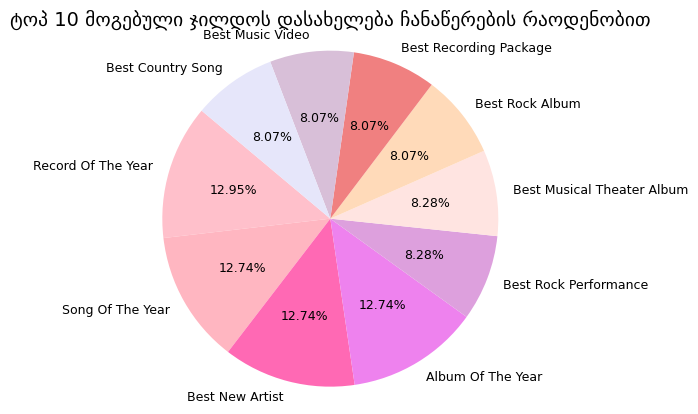

In [13]:
import sqlite3
conn = sqlite3.connect('2018-2024_grammys.sqlite3')
c = conn.cursor()

import matplotlib.pyplot as plt

# მონაცემების გამოტანა —Top 10 ჯილდოს რაოდენობა
c.execute('''
    SELECT "Award Name", COUNT(*) AS count
    FROM "2018-2024_grammys"
    GROUP BY "Award Name"
    ORDER BY count DESC
    LIMIT 10
''')
data = c.fetchall()

# ვქმნით ორ სიას: names შეიცავს ტოპ 10 ყველაზე ხშირად გაცემული ჯილდოს სახელებს, 
# ხოლო counts — შესაბამის რაოდენობებს, ანუ რამდენჯერ გაიცა თითოეული ჯილდო
names = [row[0] for row in data]
counts = [row[1] for row in data]


colors = ['pink', 'lightpink', 'hotpink', 'violet', 'plum', 'mistyrose', 
          'peachpuff', 'lightcoral', 'thistle', 'lavender']

#დიაგრამის აგება
plt.pie(counts, labels=names, autopct='%1.2f%%', startangle=140, colors=colors, textprops={'fontsize': 9})
plt.title('ტოპ 10 მოგებული ჯილდოს დასახელება ჩანაწერების რაოდენობით', fontsize=14)
plt.axis('equal')
plt.show()

# დიაგრამა გვიჩვენებს, ტოპ 10 ჯილდოს, რომლებიც გაეცა ნომინირებულებისათვის.

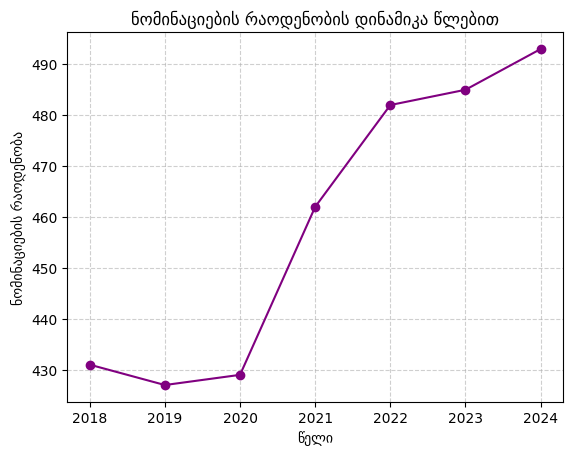

In [8]:
import sqlite3
conn = sqlite3.connect('2018-2024_grammys.sqlite3')
c = conn.cursor()

import matplotlib.pyplot as plt


# მონაცემების გამოტანა — თითო წელიწადში ჩანაწერების რაოდენობა
c.execute('''
    SELECT Year, COUNT(*) 
    FROM "2018-2024_grammys"
    GROUP BY Year
''')
data = c.fetchall()


# წლებისა და შესაბამისი ნომინაციების რაოდენობის გამოყოფა ცალკე სიებში
years = [row[0] for row in data]           
nominations = [row[1] for row in data]     

# გრაფიკული დიაგრამის აგება
plt.plot(years, nominations, marker='o', color='purple')
plt.title('ნომინაციების რაოდენობის დინამიკა წლებით')
plt.xlabel('წელი')
plt.ylabel('ნომინაციების რაოდენობა')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(years)
plt.show()

#დიაგრამა გვიჩვენებს, წლიდან წლამდე რამდენი ნომინაცია იყო ჯამურად ბაზაში.
